## Automobile Dataset

Memprediksi harga mobil berdasarkan beberapa atribut

### Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

Load Data

In [3]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None)

Check Missing Values

In [4]:
'''Missing Value'''

for i in range(26):
    nr = df[df[i]=='?'].shape[0]
    sum_nr = 0
    if nr>0:
        print(i,':',nr)

1 : 41
5 : 2
18 : 4
19 : 4
21 : 2
22 : 2
25 : 4


/Users/adekusmiadi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Replace '?' with NaN

In [5]:
for i in range(len(df.columns)):
    if (i!=5) and (df[i].dtypes=='object') and (df[df[i]=='?'].shape[0]>0):      #attribut 5 isiannya string (jumlah pintu)
        print('\nAttribute-',i,':',df[df[i]=='?'].shape[0])
        df[i] = df[i].replace('?', np.NaN)
        df[i] = df[i].astype('float64')


Attribute- 1 : 41

Attribute- 18 : 4

Attribute- 19 : 4

Attribute- 21 : 2

Attribute- 22 : 2

Attribute- 25 : 4


Drop Missing Values

In [6]:
'''Drop Missing Value'''

df[5] = df[5].replace('?', np.NaN)
df_drop = df.dropna()
df_drop.shape[0]

159

In [7]:
df[5].mode()

0    four
dtype: object

In [8]:
for i in range(len(df.columns)):
    if (df[df[i].isnull()].shape[0]>0):
        print('\nAttribute-',i,' (before) :',df[df[i].isnull()].shape[0])
        if (df[i].dtypes in ['int64','float64']):
            df[i].fillna(df[df[i].notnull()][i].mean(), inplace=True)
        if (i==5):
            df[i].fillna('four', inplace=True)
            print('\nAttribute-',i,' (after) :',df[df[i].isnull()].shape[0])


Attribute- 1  (before) : 41

Attribute- 5  (before) : 2

Attribute- 5  (after) : 0

Attribute- 18  (before) : 4

Attribute- 19  (before) : 4

Attribute- 21  (before) : 2

Attribute- 22  (before) : 2

Attribute- 25  (before) : 4


In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.470000,2.680000,9.00,111.000000,5000.000000,21,27,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.470000,2.680000,9.00,111.000000,5000.000000,21,27,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.00,154.000000,5000.000000,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.190000,3.400000,10.00,102.000000,5500.000000,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.190000,3.400000,8.00,115.000000,5500.000000,18,22,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.190000,3.400000,8.50,110.000000,5500.000000,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.190000,3.400000,8.50,110.000000,5500.000000,19,25,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.190000,3.400000,8.50,110.000000,5500.000000,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.130000,3.400000,8.30,140.000000,5500.000000,17,20,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.130000,3.400000,7.00,160.000000,5500.000000,16,22,13207.129353


In [10]:
df.describe()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df[5].describe()

count      205
unique       2
top       four
freq       116
Name: 5, dtype: object

In [12]:
df[2].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: 2, dtype: int64

Encode object columns with category

In [13]:
for i in range(len(df.columns)):
    if (df[i].dtypes=='object'):
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.470000,2.680000,9.00,111.000000,5000.000000,21,27,13495.000000
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.470000,2.680000,9.00,111.000000,5000.000000,21,27,16500.000000
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.680000,3.470000,9.00,154.000000,5000.000000,19,26,16500.000000
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.190000,3.400000,10.00,102.000000,5500.000000,24,30,13950.000000
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.190000,3.400000,8.00,115.000000,5500.000000,18,22,17450.000000
5,2,122.0,1,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.190000,3.400000,8.50,110.000000,5500.000000,19,25,15250.000000
6,1,158.0,1,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.190000,3.400000,8.50,110.000000,5500.000000,19,25,17710.000000
7,1,122.0,1,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,5,3.190000,3.400000,8.50,110.000000,5500.000000,19,25,18920.000000
8,1,158.0,1,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.130000,3.400000,8.30,140.000000,5500.000000,17,20,23875.000000
9,0,122.0,1,1,1,1,2,0,0,99.5,178.2,67.9,52.0,3053,3,1,131,5,3.130000,3.400000,7.00,160.000000,5500.000000,16,22,13207.129353


### Data Visualization

/Users/adekusmiadi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[Text(0, 0.5, 'Attribute 25'), Text(0.5, 0, 'Attribute 2')]

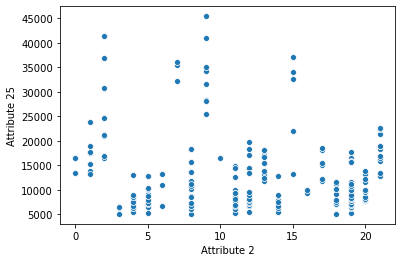

In [14]:
df_price=df[df[25]!='?'][25].astype("int64")
sns.scatterplot(x=df[2],y=df_price).set(xlabel='Attribute 2', ylabel='Attribute 25')

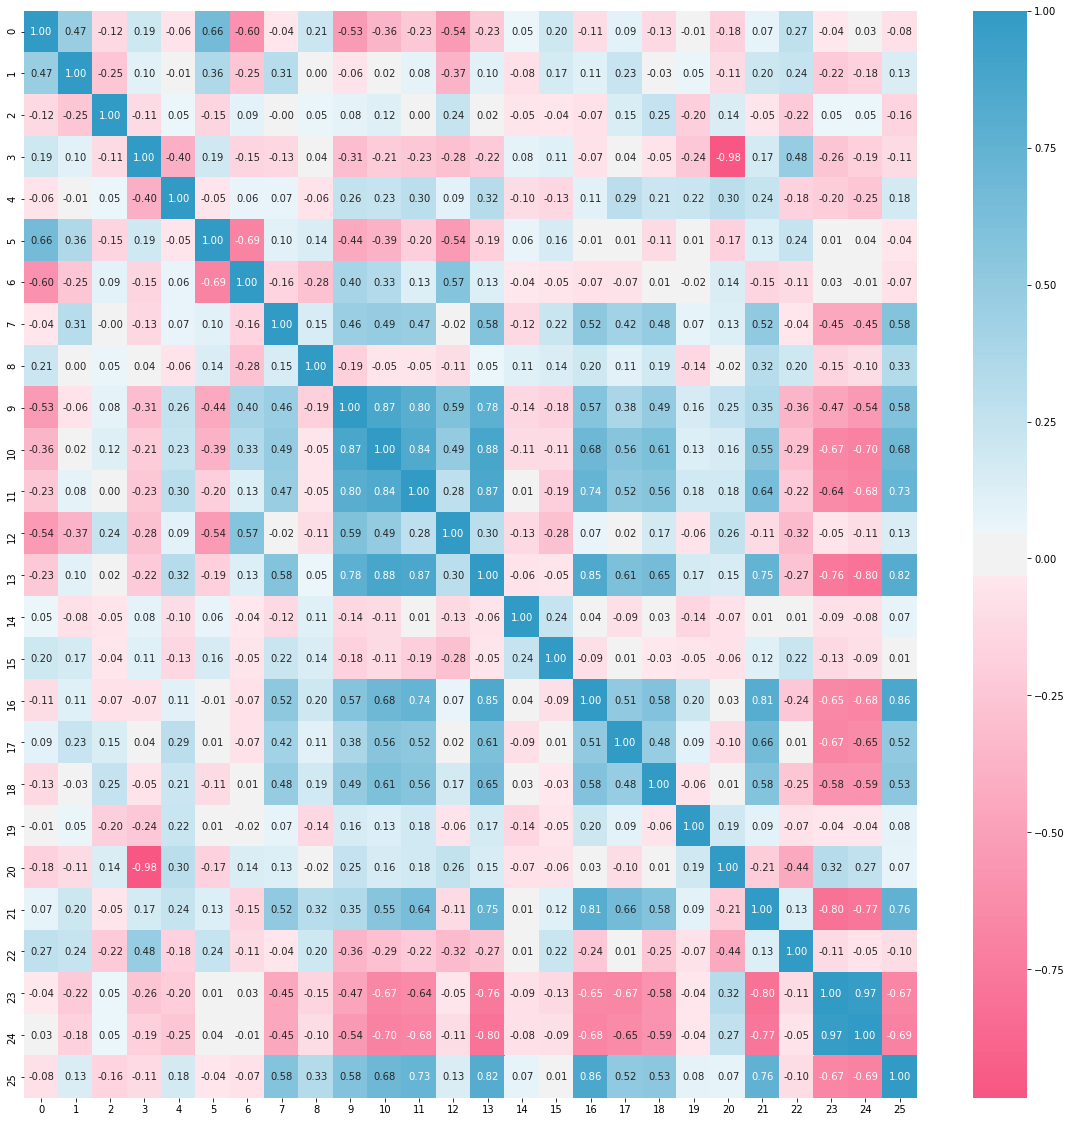

In [15]:
corr = df.corr()

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=cmap, fmt='.2f')

### Machine Learning using Linear Regression

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [20]:
dataset = df
x = dataset.drop(columns=25)
y = dataset[25]

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

In [22]:
(trainX, testX, trainY, testY) = train_test_split(x,y, random_state=3, test_size=0.2)

In [23]:
reg.fit(trainX, trainY)
score = reg.score(trainX, trainY)
coef = reg.coef_
intercept = reg.intercept_

print("Score: ", score)
print("Coefficient: ", coef)
print("Intercept: ", intercept)

Score:  0.879041401278749
Coefficient:  [   94.51499921 -1620.58615505 -4525.15104215 -1457.07760313
  2470.86701893  -730.6259349  -4842.8507612   1164.74537324
 11747.92592195  2765.6925256   6661.75765668  2011.31436034
  4870.72144918  4094.16799945  3172.82592461  7016.53743829
 37245.86525474  2156.82364796 -2133.63492708 -6443.9897063
 -1786.76241834 -6849.64068547  7019.18827018  2915.5496127
   875.83151997]
Intercept:  -1343.1750504066713


In [24]:
result = reg.predict(testX)
result

array([10667.93058809,  8391.42335456,  5525.55629663,  7464.77647817,
        6120.10470756, 26114.70117215,  8794.30342131,  5764.85656479,
        6430.75393948, 32546.15745336,  5702.43831079,  7419.07706473,
        5300.48252267, 22542.94980325, 31016.94556977,  9553.52548174,
        5221.07728172, 11185.57922867,  5002.47797605,  8336.60153377,
       24688.89472305, 23204.09278234,  7726.6109416 , 13085.24640407,
       11449.89105046, 14837.56659566, 22056.91324617, 13162.22488402,
       18030.90067162, 22570.51771766,  6805.93336847, 19491.30110177,
       13219.98825805, 41271.494495  , 12093.09297226,  7078.1901166 ,
       11673.14575067, 29002.22824727, 15085.0074932 , 10186.03786959,
        6745.68582203])

In [29]:
result.tolist()

[10667.93058809078,
 8391.423354558394,
 5525.556296629924,
 7464.776478168713,
 6120.104707561759,
 26114.701172153298,
 8794.303421306058,
 5764.856564788347,
 6430.7539394821315,
 32546.157453361113,
 5702.4383107915455,
 7419.077064726711,
 5300.482522666654,
 22542.949803246316,
 31016.94556976617,
 9553.525481738026,
 5221.07728171831,
 11185.579228672592,
 5002.477976051493,
 8336.601533767933,
 24688.894723049387,
 23204.09278234004,
 7726.610941598876,
 13085.246404065661,
 11449.891050461909,
 14837.566595655311,
 22056.913246165634,
 13162.224884016612,
 18030.900671619645,
 22570.517717657793,
 6805.93336847314,
 19491.301101766585,
 13219.988258049396,
 41271.494494996296,
 12093.09297225684,
 7078.190116599912,
 11673.145750671589,
 29002.22824726582,
 15085.00749319709,
 10186.037869594076,
 6745.685822027286]

In [26]:
df[25].describe()

count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: 25, dtype: float64

In [27]:
testX.shape

(41, 25)

In [32]:
testX

array([[1.        , 0.29842932, 0.95238095, ..., 0.55102041, 0.30555556,
        0.34210526],
       [0.8       , 0.29842932, 0.95238095, ..., 0.44897959, 0.38888889,
        0.47368421],
       [0.6       , 0.28272251, 0.66666667, ..., 0.55102041, 0.66666667,
        0.65789474],
       ...,
       [0.8       , 0.51832461, 0.04761905, ..., 0.55102041, 0.13888889,
        0.15789474],
       [0.4       , 0.29842932, 0.76190476, ..., 0.39810998, 0.27777778,
        0.39473684],
       [0.6       , 0.46596859, 0.66666667, ..., 0.55102041, 0.5       ,
        0.57894737]])

In [33]:
testX = pd.DataFrame(testX)
testX

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.0,0.298429,0.952381,1.0,0.0,1.0,0.00,0.5,0.0,0.230321,0.271642,0.325000,0.650000,0.297130,0.500000,0.333333,0.181132,0.714286,0.464286,0.633333,0.09375,0.175000,0.551020,0.305556,0.342105
1,0.8,0.298429,0.952381,1.0,0.0,1.0,0.75,0.5,0.0,0.311953,0.456716,0.433333,0.658333,0.279674,0.500000,0.333333,0.181132,0.714286,0.464286,0.633333,0.12500,0.154167,0.448980,0.388889,0.473684
2,0.6,0.282723,0.666667,1.0,0.0,1.0,0.50,0.5,0.0,0.206997,0.241791,0.291667,0.250000,0.166796,0.500000,0.333333,0.109434,0.142857,0.307143,0.552381,0.15000,0.083333,0.551020,0.666667,0.657895
3,0.6,0.539267,0.904762,1.0,0.0,1.0,0.75,1.0,0.0,0.230321,0.411940,0.308333,0.400000,0.301396,0.000000,0.333333,0.139623,0.714286,0.500000,0.480952,0.15000,0.266667,1.000000,0.361111,0.342105
4,0.4,0.136126,0.904762,1.0,0.0,0.0,0.75,0.5,0.0,0.265306,0.376119,0.341667,0.433333,0.235066,0.500000,0.333333,0.139623,0.142857,0.464286,0.457143,0.12500,0.091667,0.265306,0.694444,0.815789
5,0.2,0.146597,0.428571,0.0,1.0,0.0,0.75,1.0,0.0,0.845481,0.917910,0.950000,0.708333,0.885182,0.500000,0.166667,0.460377,0.428571,0.742857,0.747619,0.90625,0.312500,0.081633,0.250000,0.236842
6,0.2,0.000000,0.904762,1.0,0.0,0.0,0.75,0.5,0.0,0.460641,0.514925,0.516667,0.591667,0.325058,0.500000,0.333333,0.230189,0.714286,0.550000,0.700000,0.10625,0.183333,0.020408,0.444444,0.473684
7,0.4,0.083770,0.904762,1.0,0.0,0.0,1.00,0.0,0.0,0.265306,0.426866,0.275000,0.941667,0.311094,0.500000,0.333333,0.116981,0.142857,0.364286,0.457143,0.12500,0.058333,0.265306,0.388889,0.421053
8,0.6,0.434555,0.190476,1.0,0.0,0.0,0.75,0.5,0.0,0.206997,0.241791,0.291667,0.233333,0.194337,0.500000,0.333333,0.109434,0.142857,0.307143,0.552381,0.15000,0.083333,0.551020,0.500000,0.578947
9,0.2,0.298429,0.428571,1.0,0.0,0.0,0.75,1.0,0.0,0.845481,0.917910,0.950000,0.725000,0.873545,0.833333,0.000000,0.652830,0.714286,0.657143,0.490476,0.08125,0.445833,0.244898,0.083333,0.052632


In [34]:
df_new = testX
df_new['predict'] = result

### Prediction

In [35]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,predict
0,1.0,0.298429,0.952381,1.0,0.0,1.0,0.00,0.5,0.0,0.230321,0.271642,0.325000,0.650000,0.297130,0.5,0.333333,0.181132,0.714286,0.464286,0.633333,0.09375,0.175000,0.551020,0.305556,0.342105,10667.930588
1,0.8,0.298429,0.952381,1.0,0.0,1.0,0.75,0.5,0.0,0.311953,0.456716,0.433333,0.658333,0.279674,0.5,0.333333,0.181132,0.714286,0.464286,0.633333,0.12500,0.154167,0.448980,0.388889,0.473684,8391.423355
2,0.6,0.282723,0.666667,1.0,0.0,1.0,0.50,0.5,0.0,0.206997,0.241791,0.291667,0.250000,0.166796,0.5,0.333333,0.109434,0.142857,0.307143,0.552381,0.15000,0.083333,0.551020,0.666667,0.657895,5525.556297
3,0.6,0.539267,0.904762,1.0,0.0,1.0,0.75,1.0,0.0,0.230321,0.411940,0.308333,0.400000,0.301396,0.0,0.333333,0.139623,0.714286,0.500000,0.480952,0.15000,0.266667,1.000000,0.361111,0.342105,7464.776478
4,0.4,0.136126,0.904762,1.0,0.0,0.0,0.75,0.5,0.0,0.265306,0.376119,0.341667,0.433333,0.235066,0.5,0.333333,0.139623,0.142857,0.464286,0.457143,0.12500,0.091667,0.265306,0.694444,0.815789,6120.104708
